# Q&A Activity Question Week -10
Do the following on the dataset
1. Load the data into the pandas environment and identify some basic details of the
dataset.
2. Reset the index as "name" as the index.
3. Select rows for specific names Jack Morgan and Josh wills.
4. Select data for multiple values "Sales" and “Finance”.
5. Display employee who has more than 700 performance score.
6. Display employee who has more than 500 and less than 700 performance score
7. Check and handle missing values in the dataset.
8. Check the outliers and handle outliers in performance score using Percentiles.
9. Check the gender column and do Dummy encoding.
10. Do the standard scaling on the feature performance score.

In [1]:
#importing pandas,numply,matplotlib.pyplot,seaborn libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

### 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [2]:
#Reading the dataset to the pandas environment
data=pd.read_csv('employee.csv')

In [3]:
#displaying  the dataset
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [4]:
#To know data types of each columns and checking for null values in the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


About our Dataset:

-  The dataset consists of details of 9 employees of a company. 
- There are 7 columns/features
- the details include their name,age,income obtained,gender,department in which they work,grade and their performance scores.
- 3 of the features are numerical, and 4 are object data types
- Also there are some empty/NaN values present in the dataset in the columns of "Age","income","gender".


In [5]:
data.describe(include='all')

,name,age,income,gender,department,grade,performance_score
count,9,7.000000,7.000000,7,9,9,9.000000
unique,9,NaN,NaN,2,3,4,NaN
top,Leo Duck,NaN,NaN,F,Sales,G3,NaN
freq,1,NaN,NaN,5,3,5,NaN
mean,NaN,40.428571,52857.142857,NaN,NaN,NaN,610.666667
std,NaN,12.204605,26028.372797,NaN,NaN,NaN,235.671912
min,NaN,23.000000,16000.000000,NaN,NaN,NaN,53.000000
25%,NaN,31.000000,38500.000000,NaN,NaN,NaN,556.000000
50%,NaN,45.000000,52000.000000,NaN,NaN,NaN,674.000000
75%,NaN,49.500000,63500.000000,NaN,NaN,NaN,711.000000


Insight:
 
- Average age of employees in this dataset is 40<br>     
- Average income of employees in this dataset is 52857 <br>
- Average performance_score is 611 <br>
- out of 9 employess in this dataset ,5 of them are females 
- 3 departments (Operations,Finance,Sales) <br>
- 4 Grades

### 2. Reset the index as "name" as the index.

In [6]:
data.set_index('name', inplace=True)
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 3. Select rows for specific names Jack Morgan and Josh wills.

In [7]:
data.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


### 4. Select data for multiple values "Sales" and “Finance”.

In [8]:
data[data['department'].isin(['Sales','Finance'])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 5. Display employee who has more than 700 performance score.

In [9]:
data[data['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 6. Display employee who has more than 500 and less than 700 performance score

In [10]:
data.loc[(data['performance_score']>500) & (data['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


### 7. Check and handle missing values in the dataset.

In [12]:
#Check for the null values present in each column of  dataset using 'isnull().sum()' function
data.isnull().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

Find:
    
     No. of missing values in the dataset:
           age    - 2 Nan/Missing values
           Income - 2 Nan/Missing values
           gender - 2 Nan/Missing values

1.age

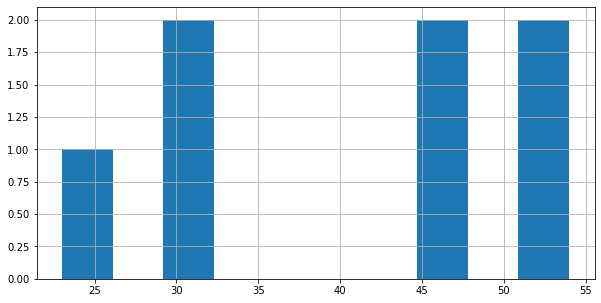

In [13]:
freqgraph=data.age
freqgraph.hist(figsize=(10,5))
plt.show()

In [14]:
data.age.describe()

count     7.000000
mean     40.428571
std      12.204605
min      23.000000
25%      31.000000
50%      45.000000
75%      49.500000
max      54.000000
Name: age, dtype: float64

In [15]:
#filling with median value
data["age"].fillna(data['age'].median(), inplace = True) 

2.income

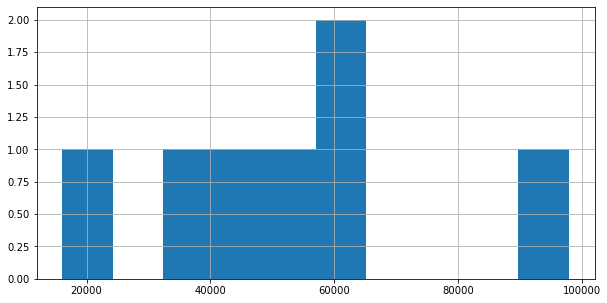

In [16]:
freqgraph=data.income
freqgraph.hist(figsize=(10,5))
plt.show()

In [17]:
data.income.describe()

count        7.000000
mean     52857.142857
std      26028.372797
min      16000.000000
25%      38500.000000
50%      52000.000000
75%      63500.000000
max      98000.000000
Name: income, dtype: float64

In [18]:
#filling with median value
data["income"].fillna(data['income'].median(), inplace = True) 

3.gender

In [19]:
data['gender'].mode()

0    F
dtype: object

In [20]:
#gender is categorical feature,so filling with mode value
data["gender"].fillna(data['gender'].mode()[0], inplace = True) 

In [21]:
#Check for the null values present in each column of  dataset using 'isnull().sum()' function
data.isnull().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

No Null Values

### 8. Check the outliers and handle outliers in performance score using Percentiles.

<AxesSubplot:xlabel='performance_score'>

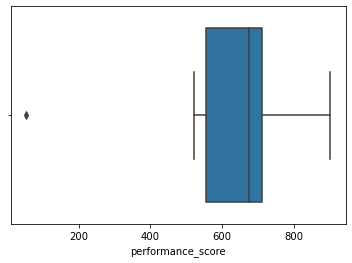

In [23]:
#boxplot to check for outliers
sns.boxplot(x='performance_score',data=data)

**outlier is found in the performance_score column**

In [24]:
#defining percentiles,IQR,Lower limit,Upper limit 
Q1=np.percentile(data['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(data['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(data['performance_score'],75,interpolation='midpoint')
print("Q1",Q1)
print("Q2",Q2)
print("Q3",Q3)
print("━━━━━━━━━━━━━━━━━━━━━━")
IQR=Q3-Q1
print("IQR",IQR)
print("━━━━━━━━━━━━━━━━━━━━━━")
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("Lower limit",low_lim)
print("Upper Limit",up_lim)

Q1 556.0
Q2 674.0
Q3 711.0
━━━━━━━━━━━━━━━━━━━━━━
IQR 155.0
━━━━━━━━━━━━━━━━━━━━━━
Lower limit 323.5
Upper Limit 943.5


In [25]:
outlier=[]
for x in data['performance_score']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

print("outliers",(outlier))

outliers [53]


In [26]:
ind1=data['performance_score']<low_lim
data.loc[ind1].index

Index(['James Authur'], dtype='object', name='name')

In [27]:
data.drop(['James Authur'],inplace=True)

Text(0.5, 1.0, 'performance score')

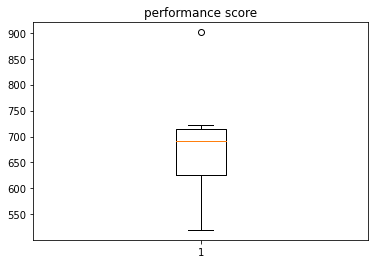

In [28]:
#boxplot to check for outliers
plt.boxplot(data['performance_score'])
plt.title('performance score')

### 9. Check the gender column and do Dummy encoding.

one hot encoding

In [29]:
data2=pd.get_dummies(data, columns=['gender'])

In [30]:
data2

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,723,1,0
S Kumar,45.0,16000.0,Finance,G0,520,1,0
Jack Morgan,32.0,35000.0,Finance,G2,674,0,1
Ying Chin,45.0,65000.0,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0
Satyam Sharma,45.0,62000.0,Sales,G3,649,1,0
Josh Wills,54.0,52000.0,Finance,G3,901,1,0
Leo Duck,23.0,98000.0,Sales,G4,709,0,1


### 10. Do the standard scaling on the feature performance score.

In [42]:
x=data.drop(['age', 'income', 'department', 'grade','gender'], axis=1)
x.describe()

,performance_score
count,8.00000
mean,680.37500
std,116.16729
min,520.00000
25%,625.75000
50%,691.50000
75%,714.00000
max,901.00000


standard scaling

In [32]:
standardisation=preprocessing.StandardScaler()
x=standardisation.fit_transform(x)

In [33]:
x=pd.DataFrame(x)
x.describe().round(3)

,0
count,8.000
mean,0.000
std,1.069
min,-1.476
25%,-0.503
50%,0.102
75%,0.309
max,2.030


`submitted by -
(Group  11)
Shilpa Shibu
Sreelekshmi M K
Roopa Thomas
Kevin M`